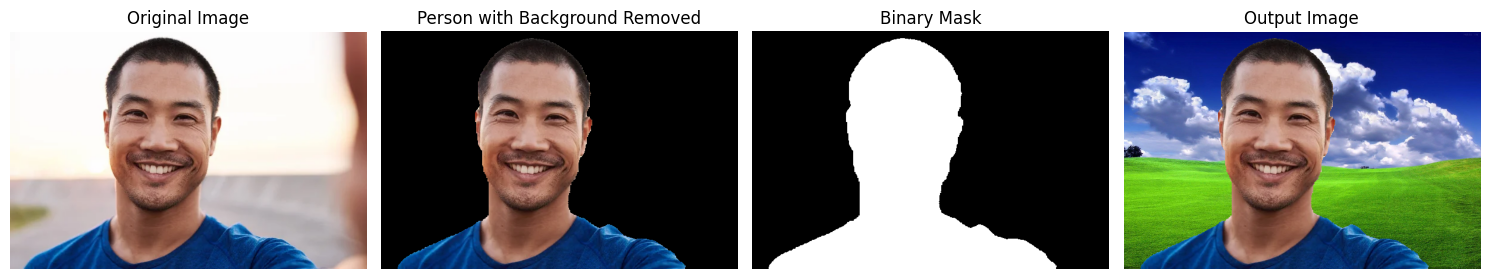

In [6]:
import cv2
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt

# Initialize Selfie Segmentation
selfie_segmentation = mp.solutions.selfie_segmentation.SelfieSegmentation()

# Load and display the sample image
sample_img = cv2.imread(r'D:\luminar classes\mediapipe project\blueselfie.jpg')
sample_img_rgb = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)

# Process the image for segmentation
segmentation_result = selfie_segmentation.process(sample_img_rgb)
segmentation_mask = segmentation_result.segmentation_mask > 0.9

# Create an output image with the person and background removed
person_only = np.where(segmentation_mask[:, :, np.newaxis], sample_img, 0)

# Load a background image and resize it to match the dimensions of the sample image
background_img = cv2.imread(r'D:\luminar classes\mediapipe project\bg1131387.jpg')
background_img = cv2.resize(background_img, (sample_img.shape[1], sample_img.shape[0]))


# Create the output image with the new background
output_image = np.where(segmentation_mask[:, :, np.newaxis], sample_img, background_img)
# output_image = np.where(segmentation_mask[:, :, np.newaxis], sample_img, background_img)
# output_image = np.where(segmentation_mask[:, :, np.newaxis], sample_img, 255 * np.ones_like(sample_img))


plt.figure(figsize=(15, 7))

# Original Image
plt.subplot(141)
plt.imshow(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

# Person with Background Removed
plt.subplot(142)
plt.imshow(cv2.cvtColor(person_only, cv2.COLOR_BGR2RGB))
plt.title("Person with Background Removed")
plt.axis('off')

# Binary Mask
plt.subplot(143)
plt.imshow(segmentation_mask, cmap='gray')
plt.title("Binary Mask")
plt.axis('off')

# Output Image
plt.subplot(144)
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title("Output Image")
plt.axis('off')

# Show the plots
plt.tight_layout()
plt.show()

# Release resources
selfie_segmentation.close()